In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from pathlib import Path

In [2]:
from scipy import signal
from scipy.fft import fftshift
from scipy.io.wavfile import read

In [3]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay

In [4]:
import librosa
from librosa.feature import melspectrogram, mfcc

In [6]:
from typing import List, Tuple

In [5]:
from audio_utils import *

In [7]:
Categories=['Cough', 'Sneeze']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='data/input/' 

In [8]:
spectrogram_array = []
target_array = []
for i in Categories:
    print(f'loading... category : {i}')
    path = os.path.join(datadir, i)
    for sound in os.listdir(os.path.join(datadir,i)):
        if sound.endswith('.wav'):
            spectrogram_array.append(get_spectrogram(os.path.join(path, sound)))
            # spectrogram_array.append(get_spectrogram(os.path.join(path, sound)))
            target_array.append(Categories.index(i))
    print(f'loaded category:{i} successfully')

loading... category : Cough
loaded category:Cough successfully
loading... category : Sneeze
loaded category:Sneeze successfully


In [9]:
def get_maximum_shape(array_list: List[np.ndarray]) -> Tuple[int, int]:
    max_height = max_width = 0
    for arr in array_list:
        max_height = max(max_height, arr.shape[0])
        max_width = max(max_width, arr.shape[1])
    return max_height, max_width

In [10]:
max_height, max_width = get_maximum_shape(spectrogram_array)

In [11]:
flat_data_list = [pad_spectrogram(np_array=spec, target_size_w=max_width, target_size_h=max_height).flatten() for spec in spectrogram_array]

In [12]:
flat_data=np.array(flat_data_list, dtype=object)
target=np.array(target_array, dtype=int)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target

In [13]:
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data

## Classification part

In [14]:
param_grid={'C':[0.1, 1, 10, 100],'gamma':[0.0001, 0.001, 0.1, 1],'kernel':['rbf', 'poly']}
svc=svm.SVC(probability=True, verbose=1)
model=GridSearchCV(svc, param_grid)

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')

Splitted Successfully


In [16]:
x_train

,0,1,2,3,4,5,6,7,8,9,...,185515,185516,185517,185518,185519,185520,185521,185522,185523,185524
9,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,...,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336,-45.527336
22,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,...,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715,-35.845715
120,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,...,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486,-35.629486
69,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,...,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184,-32.804184
68,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,...,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354,-29.883354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,...,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776,-43.421776
123,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,...,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287,-45.145287
66,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,...,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036,-31.108036
34,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,...,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821,-39.97821


In [17]:
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

[LibSVM]*.*
optimization finished, #iter = 88
obj = -5.714257, rho = 0.911765
nSV = 64, nBSV = 30
Total nSV = 64
.*
optimization finished, #iter = 90
obj = -5.533080, rho = -0.915923
nSV = 64, nBSV = 29
Total nSV = 64
*
optimization finished, #iter = 32
obj = -6.076610, rho = 0.016755
nSV = 64, nBSV = 64
Total nSV = 64
*.*
optimization finished, #iter = 88
obj = -5.717646, rho = 0.911765
nSV = 64, nBSV = 30
Total nSV = 64
.*
optimization finished, #iter = 98
obj = -5.534857, rho = 0.917143
nSV = 64, nBSV = 29
Total nSV = 64
*.*
optimization finished, #iter = 101
obj = -7.416120, rho = -0.904878
nSV = 80, nBSV = 39
Total nSV = 80
[LibSVM]*.*
optimization finished, #iter = 92
obj = -5.715662, rho = -0.910444
nSV = 64, nBSV = 30
Total nSV = 64
*.*
optimization finished, #iter = 88
obj = -5.717646, rho = 0.911765
nSV = 64, nBSV = 30
Total nSV = 64
*
optimization finished, #iter = 32
obj = -6.076649, rho = 0.016755
nSV = 64, nBSV = 64
Total nSV = 64
.*
optimization finished, #iter = 98
obj 

In [18]:
y_pred = model.predict(x_test)

In [19]:
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The model is 92.3076923076923% accurate


In [21]:
np.set_printoptions(precision=2)

In [22]:
# Plot non-normalized confusion matrix
titles_options = [
    ("Confusion matrix, without normalization", None),
    ("Normalized confusion matrix", "true"),
]

Confusion matrix, without normalization
[[15  0]
 [ 0 11]]
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


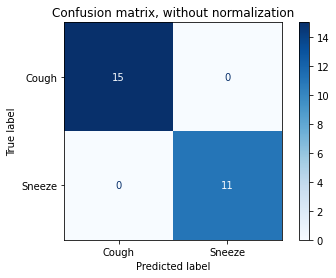

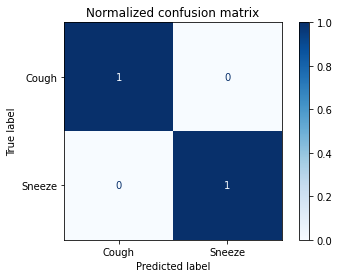

In [27]:
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(
        model,
        x_test,
        y_pred,
        display_labels=Categories,
        cmap=plt.cm.Blues,
        normalize=normalize,
    )
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [28]:
# print best parameter after tuning
print(model.best_params_)

{'C': 0.1, 'gamma': 0.0001, 'kernel': 'poly'}


In [29]:
# print how our model looks after hyper-parameter tuning
print(model.best_estimator_)

SVC(C=0.1, gamma=0.0001, kernel='poly', probability=True, verbose=1)
